In [1]:
import numpy as np

RS = np.fromfile('../data/train/RS')[2:]

RS.resize(1400, 225000)

In [3]:
RS

array([[ 9.99683903e-01,  6.63204195e-03, -2.42509643e-02, ...,
         5.20175113e-01,  2.82665061e-01,  1.02787696e+00],
       [ 9.96398343e-01, -8.47954161e-02,  2.80950636e-04, ...,
         3.83886723e-01,  2.74932252e-01,  8.62245537e-01],
       [ 9.92566817e-01, -1.21691094e-01, -1.54640230e-03, ...,
         2.73756872e-01,  1.89905402e-01,  6.09405980e-01],
       ...,
       [ 9.99895073e-01, -9.89404915e-03, -1.05806692e-02, ...,
         1.73129712e-01,  1.66991911e-01,  4.46550623e-01],
       [ 9.98709239e-01, -1.72260881e-02, -4.77819846e-02, ...,
         1.39923052e-01,  8.99337896e-02,  3.04991346e-01],
       [ 9.95759740e-01, -8.47560813e-02, -3.57623581e-02, ...,
         1.35264123e-01,  1.26516547e-01,  3.59156497e-01]])

array([[ 9.99658958e+04,  6.03034583e+02, -2.54087244e+03, ...,
         5.18052697e+04,  2.82246794e+04,  1.02460919e+05],
       [ 9.96350335e+04, -8.53533829e+03, -9.00459764e+01, ...,
         3.82651970e+04,  2.73980426e+04,  8.59174380e+04],
       [ 9.92494778e+04, -1.22256867e+04, -2.71541466e+02, ...,
         2.72916784e+04,  1.89199508e+04,  6.07126870e+04],
       ...,
       [ 9.99876280e+04, -1.04460040e+03, -1.17603124e+03, ...,
         1.72858725e+04,  1.65975237e+04,  4.44763237e+04],
       [ 9.98642283e+04, -1.77450054e+03, -4.89765751e+03, ...,
         1.39513006e+04,  8.97785581e+03,  3.04005103e+04],
       [ 9.95665955e+04, -8.53622725e+03, -3.69132580e+03, ...,
         1.34964959e+04,  1.25854445e+04,  3.57524147e+04]])

In [5]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=120)
newf = pca.fit_transform(RS)

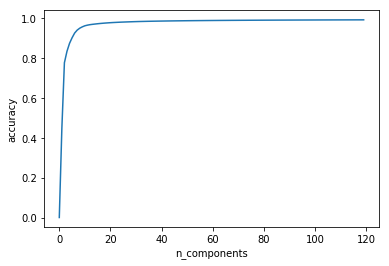

In [10]:
%matplotlib inline
y = [np.sum(pca.explained_variance_ratio_[0:i]) for i in range(0, 120)]
x = [i for i in range(0, 120)]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylabel("accuracy")
plt.xlabel("n_components")
plt.savefig('../images/chartgraph/rs_pca_figure.jpg')

In [12]:
y[50]

0.9888286938319882


X = []
Y = []
Z = []
for i in range(1511):
    for j in range(120):
        X.append(i)
        Y.append(j)
        Z.append(newf[i, j])
        
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X, Y, Z)

In [58]:
newf[0, :].min()

-101.01417942123015

In [60]:
x = np.random.rand(1, 120)*200-100
x

array([[ 31.25972531,  54.15753157, -87.76974095,  81.31261942,
         66.57965249,   1.76756646,  85.93546621, -62.71207365,
        -27.77472113,  32.82613471, -63.97956425,  69.14973909,
        -29.78116826,  65.70574736,  46.96790442, -36.36173636,
         38.26960088,  46.57433302,  65.22741102,  79.76271261,
         64.91266097,  97.74135812, -54.85080323, -35.33993447,
        -60.39782128,   0.25764879,  19.47064086,  82.07296724,
         11.21140067,  64.94414793,   5.38931566,  -4.3471245 ,
        -63.20585855, -27.60451261,  93.45878634,  93.99284282,
          0.67931271, -82.69507403, -55.49561536,  44.86430728,
        -27.83594422, -96.06305403,   6.75092661, -87.29206852,
         31.79487124, -42.72785742, -65.02627478, -51.83164441,
        -45.4487026 , -75.43641984,  59.36118404, -87.65533242,
         47.50532517,  26.44622289,   7.94822464, -63.31549196,
          3.32453513,  56.90670947, -90.98058916, -78.06965154,
         72.39971107,  10.9553427 , -99.

In [61]:
newx = np.dot(newf[0, :]+x, pca.components_)

In [62]:
diff = ((newx - RS[0, :])**2).mean()
diff

1.9714103687500304

In [63]:
newx.shape

(1, 225000)

In [64]:
np.savetxt('../data/T.txt',newx, delimiter=' ')

In [22]:
newx

array([0.99237525, 0.05789088, 0.00207984, ..., 0.42626523, 0.27480968,
       0.91128132])